<a href="https://colab.research.google.com/github/Kishankumar1328/SVM/blob/main/Cancer_Classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
import itertools

In [2]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2024-02-07 18:03:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2024-02-07 18:03:56 (198 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [3]:
df=pd.read_csv("/content/cell_samples.csv")
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.shape

(699, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
UnifSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
UnifShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MargAdh,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingEpiSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChrom,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
NormNucl,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mit,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


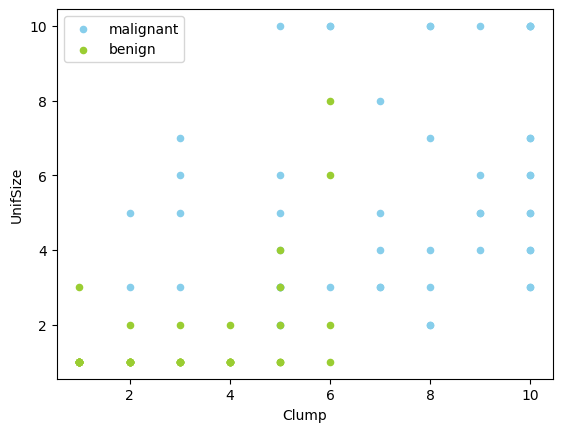

In [10]:
ax = df[df['Class'] == 4][0:50].plot(kind="scatter",x="Clump",y="UnifSize", color="skyblue", alpha=1, label='malignant');
df[df['Class'] == 2][0:50].plot(kind="scatter",x='Clump',y="UnifSize", color="Yellowgreen", alpha=1, label='benign', ax=ax);
plt.show()

In [11]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df["BareNuc"].astype('int')
df.dtypes

<ipython-input-11-314ece6cd968>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc']=df["BareNuc"].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [15]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asanyarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [16]:
y=np.asanyarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print("Train set:",x_train.shape,y_train.shape)
print("Test set:",x_test.shape,y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [21]:
clf=svm.SVC(kernel='rbf')#rbf
clf.fit(x_train,y_train)

SVC()

In [23]:
yhat=clf.predict(x_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [46]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="confusion matrix",
                          cmap=plt.cm.Reds):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix,Without Normalization")

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")



              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion Matrix,Without Normalization
[[85  5]
 [ 0 47]]


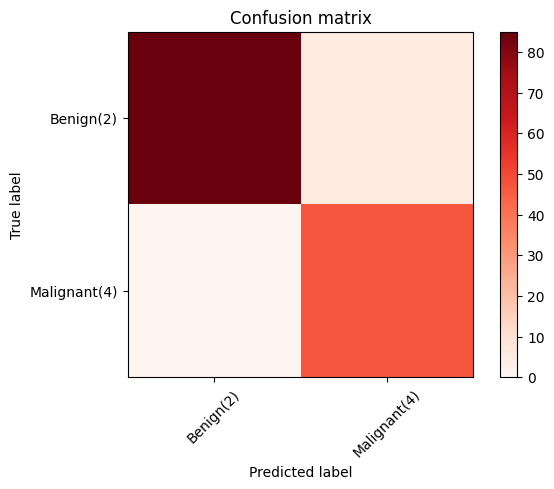

In [47]:
cnf_matrix=confusion_matrix(y_test,yhat,labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test,yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')


In [48]:
f1_score(y_test,yhat,average='weighted')

0.9639038982104676

In [49]:
jaccard_score(y_test,yhat,pos_label=2)

0.9444444444444444

In [50]:
jaccard_score(y_test,yhat,pos_label=4)

0.9038461538461539

In [52]:
clf2=svm.SVC(kernel="linear")#linear
clf2.fit(x_train,y_train)

SVC(kernel='linear')

In [55]:
yhat2=clf2.predict(x_test)
yhat2[0:16]

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2])

In [59]:
print("F1_Score:%.4f"%f1_score(y_test,yhat2,average="weighted"))
print("Jaccard_score:%.4f"%jaccard_score(y_test,yhat2,pos_label=4))
print("Jaccard_score:%.4f"%jaccard_score(y_test,yhat2,pos_label=2))

F1_Score:0.9639
Jaccard_score:0.9038
Jaccard_score:0.9444
